# Simple Landscape

In [28]:
# Fix PROJ path ---------------------------------------------------------------
import os; os.environ['PROJ_LIB']='/path/to/env/share/proj'
# Load libraries --------------------------------------------------------------
import pandas as pd
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('simpleLanscape', './out/')
srv.makeFolder(OUT_PTH)

## Creating Sites

In [12]:
pts = {
    'x': (0.0, 2.0, 2.5, 1.0),
    'y': (0.0, 0.5, 1.5, 3.0),
    't': (0, 0, 0, 0)
}
points = pd.DataFrame(pts)
points

,x,y,t
0,0.0,0.0,0
1,2.0,0.5,0
2,2.5,1.5,0
3,1.0,3.0,0


## Creating Traps

In [18]:
trp = {
   'x': (2.5, 0.0),
   'y': (0.7, 0.5),
   't': (0, 0),
   'f': (0, 0)
}
traps = pd.DataFrame(trp)
tKernels = {
   0: {
      'kernel': srv.exponentialDecay, 
      'params': {'A': 0.5, 'b': 2}
   }
}

## Generating and Plotting Landscape

[(<Figure size 1500x1500 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1633368c0>),
 (<Figure size 1500x1500 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x16336ace0>)]

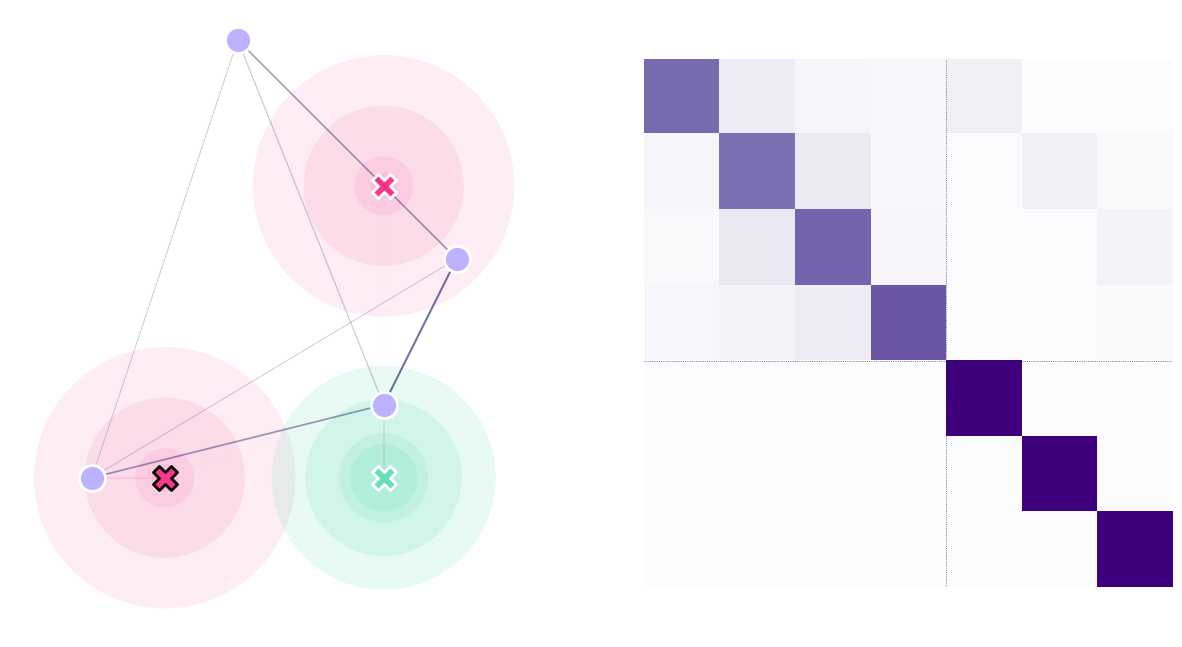

In [29]:
# Land creation ---------------------------------------------------------------
lnd = srv.Landscape(
   points,
   traps=traps, trapsKernels=tKernels
)
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(15, 15), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
[srv.plotClean(fig, i, frame=False) for i in ax]

## Updating Traps

[(<Figure size 1500x1500 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1632bdbd0>),
 (<Figure size 1500x1500 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1632bf9a0>)]

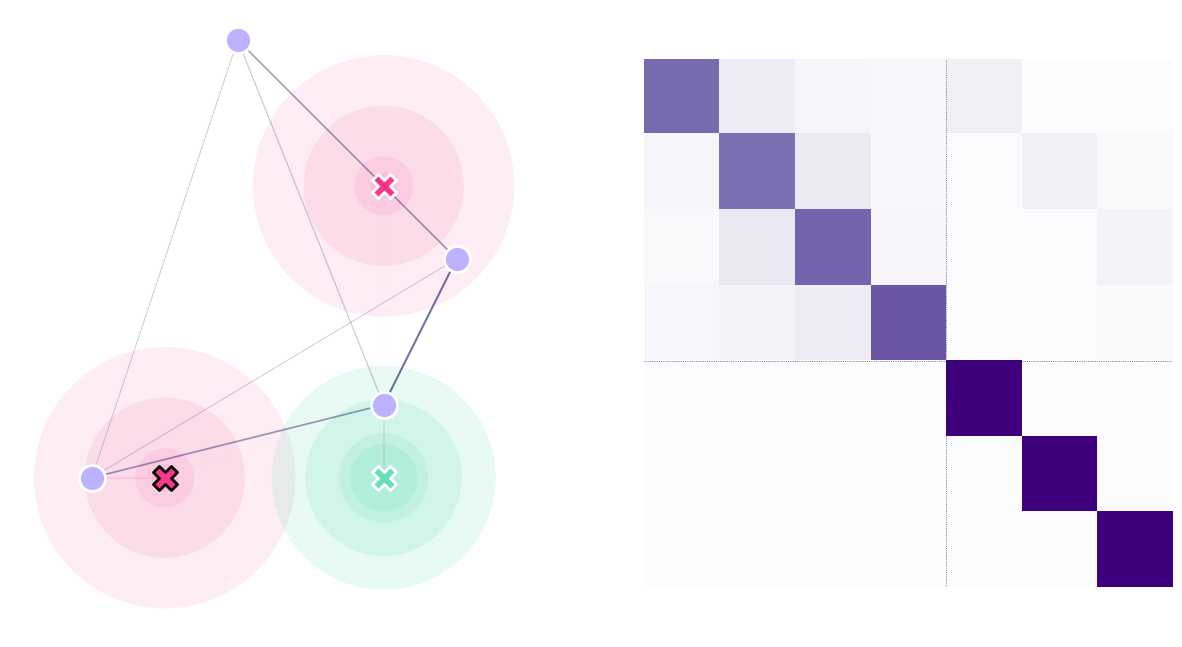

In [27]:
traps = pd.DataFrame({
    'x': [0.5, 2.0, 2.0],
    'y': [0.0, 0.0, 2.0],
    't': [0, 1, 0],
    'f': [1, 0, 0]
})
tKernels = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': .30, 'b': 2}},
    1: {'kernel': srv.exponentialDecay, 'params': {'A': .50, 'b': 3}}
}
lnd.updateTraps(traps, tKernels)
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(15, 15), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
[srv.plotClean(fig, i, frame=False) for i in ax]

<hr>

# More Information

* [Quickstart](https://chipdelmal.github.io/MGSurvE/build/html/Quickstart.html)
* [Landscape Creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html)
* Doc's Examples: [creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html), [update](https://chipdelmal.github.io/MGSurvE/build/html/landscapeUpdate.html)